In [ ]:
# 載入需要的套件
from sklearn.model_selection import train_test_split, cross_val_score

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score, confusion_matrix
import urllib.request
import os

In [ ]:
# 下載鐵達尼號資料集（簡化版）
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
file_name = "titanic.csv"
urllib.request.urlretrieve(url, file_name)

# 讀取CSV檔案
df = pd.read_csv(file_name)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# 先把文字轉成數字：'Sex' 欄位的 male 變成 0, female 變成 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# 處理缺失值：把 'Age' 裡面的空值填成平均值
df['Age'].fillna(df['Age'].mean(), inplace=True)

# 選擇我們要的欄位
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X = df[features]
y = df['Survived']  # 這是目標變數，代表有沒有生存

<ipython-input-4-f95640c73351>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [ ]:
# 分割資料：80% 拿來訓練，20% 拿來測試
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立決策樹模型
model = DecisionTreeClassifier()

In [ ]:
# 用訓練資料訓練模型
model.fit(X_train, y_train)

# 用測試資料來預測
y_pred = model.predict(X_test)

In [ ]:
# 預測出來的機率（給 AUC 用）
y_prob = model.predict_proba(X_test)[:, 1]

In [ ]:
# 評估模型
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print("🔍 模型評估指標")
print("------------------------")
print("✅ F1 Score:", round(f1, 4))
print("✅ AUC Score:", round(auc, 4))
print("✅ Precision（精確率）:", round(precision, 4))
print("✅ Recall（召回率）:", round(recall, 4))
print("✅ Confusion Matrix（混淆矩陣）:\n", cm)

🔍 模型評估指標
------------------------
✅ F1 Score: 0.7123
✅ AUC Score: 0.7657
✅ Precision（精確率）: 0.7222
✅ Recall（召回率）: 0.7027
✅ Confusion Matrix（混淆矩陣）:
 [[85 20]
 [22 52]]


In [ ]:
#F1 分數是綜合準確與完整的成績
#AUC 是越接近 1 越好，代表模型判斷能力越強
#Precision 是被預測為「生存」的人裡，有多少是真的生存
#Recall 是實際「生存」的人裡，有多少被模型正確找出來
#混淆矩陣則顯示模型正確或錯誤預測的數量

In [ ]:
# 交叉驗證（5折）
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("\n📊 交叉驗證結果 (5-Fold)")
print("------------------------")
print("準確率：", cv_scores)
print("平均準確率：", round(cv_scores.mean(), 4))


📊 交叉驗證結果 (5-Fold)
------------------------
準確率： [0.81564246 0.81460674 0.81460674 0.78651685 0.82022472]
平均準確率： 0.8103


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38928 (\N{CJK UNIFIED IDEOGRAPH-9810}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28151 (\N{CJK UNIFIED IDEOGRAPH-6DF7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(b

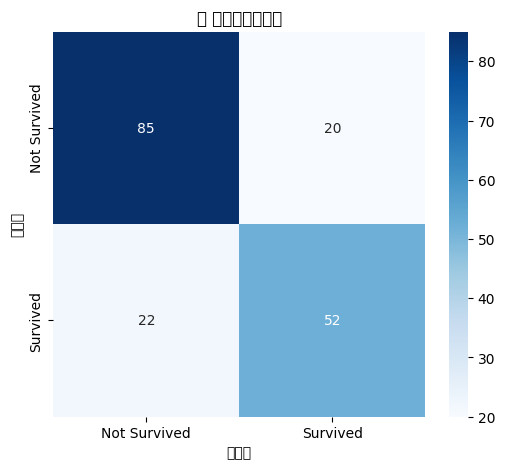

In [ ]:
import seaborn as sns

# 繪製混淆矩陣熱力圖
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('實際值')
plt.ylabel('預測值')
plt.title('🎯 混淆矩陣熱力圖')
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23384 (\N{CJK UNIFIED IDEOGRAPH-5B58}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38928 (\N{CJK UNIFIED IDEOGRAPH-9810}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figu

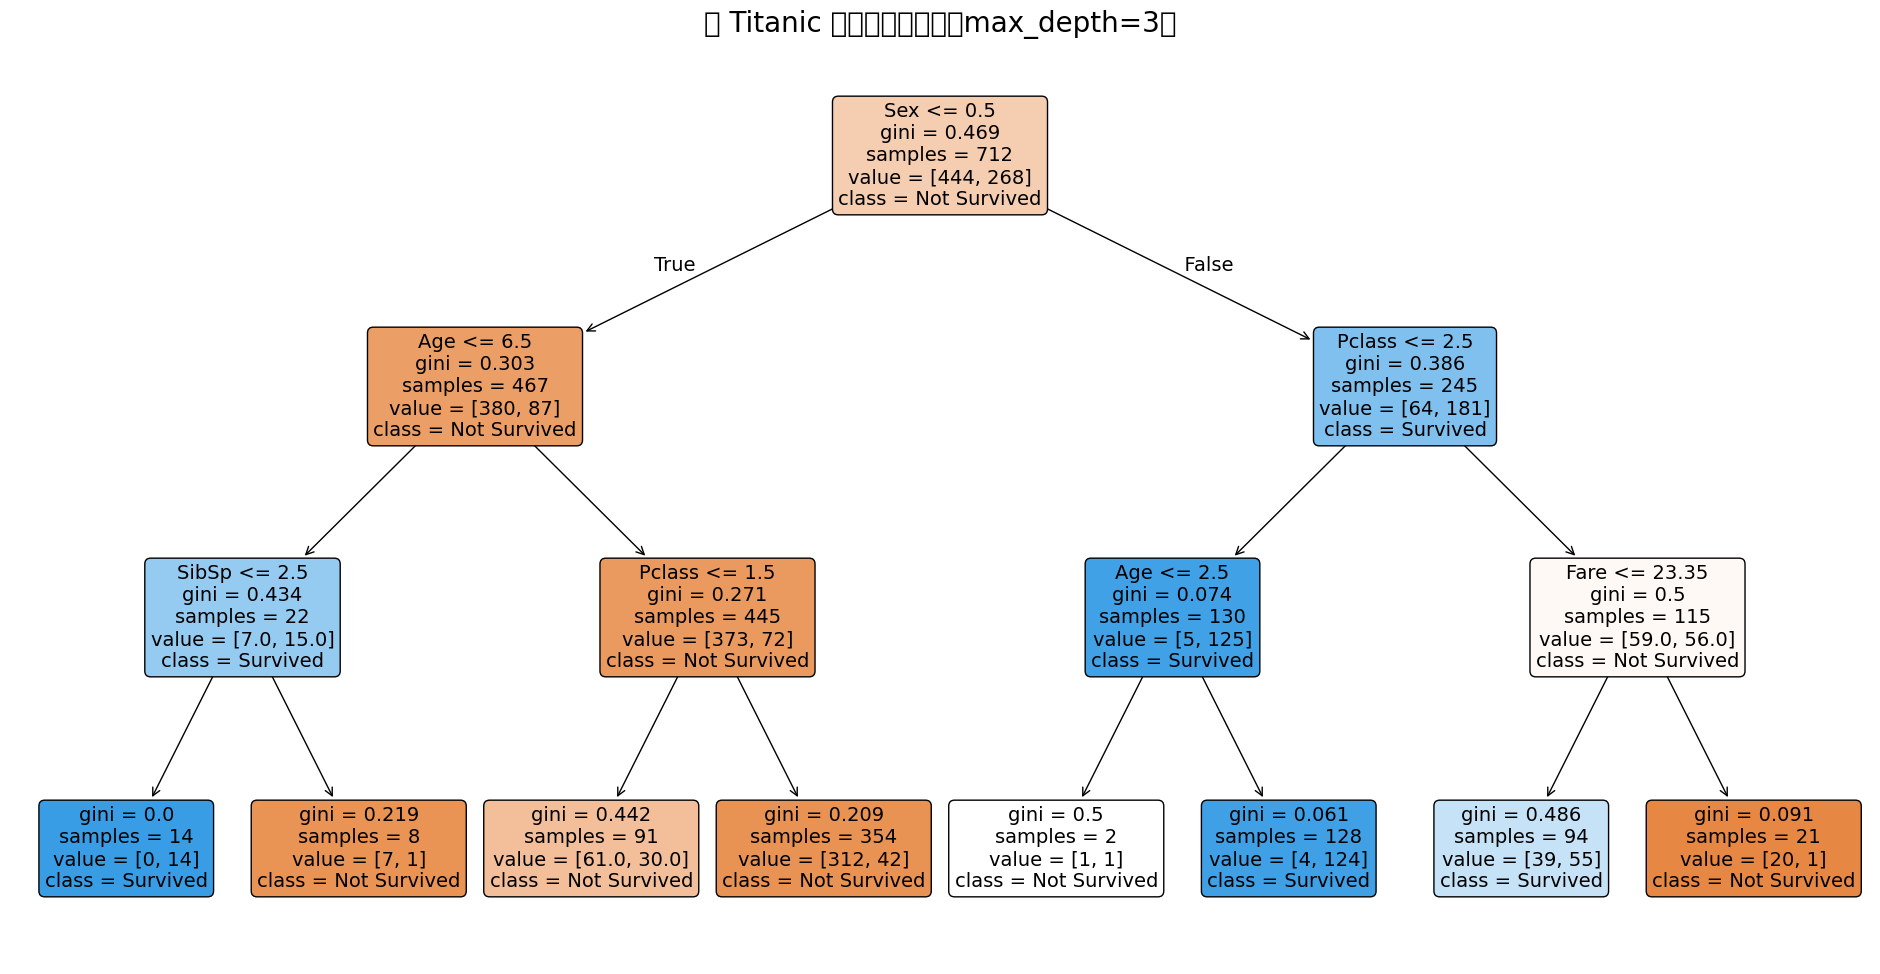

In [ ]:
# 繪製「精簡版」決策樹圖（限制 max_depth）
model_viz = DecisionTreeClassifier(max_depth=3, random_state=42)
model_viz.fit(X_train, y_train)

plt.figure(figsize=(24, 12))
plot_tree(
    model_viz,
    feature_names=features,
    class_names=["Not Survived", "Survived"],
    filled=True,
    rounded=True,
    fontsize=14
)
plt.title("🌳 Titanic 生存預測決策樹（max_depth=3）", fontsize=20)
plt.show()